In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [194]:
path="data/maythecoffeebewithyou.npy"
post_list = np.load(path,allow_pickle=True)
post_df_full = pd.read_csv("Data\maythecoffeebewithyou.csv")

In [195]:
post_df_full1=post_df_full
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )
# Merge cột vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]


C:\Users\hao17\AppData\Local\Temp\ipykernel_3032\4174996518.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )


,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,"Java, West of Krakatoa",40.0,6.0,3.0,NaN,NaN,NaN,NaN,14,0,49
1,How do you prefer your coffee?\n\nBạn thích cà...,121.0,21.0,45.0,NaN,NaN,NaN,1.0,39,205,188
2,Stay warm!\n\nGiữ ấm nhé!,161.0,31.0,NaN,NaN,NaN,NaN,1.0,36,25,193
3,Valid.\n\nHợp lệ.,690.0,161.0,139.0,NaN,NaN,NaN,9.0,618,72,999
4,Isn't that nice? Hmmm?,282.0,40.0,82.0,NaN,NaN,NaN,3.0,229,30,407
...,...,...,...,...,...,...,...,...,...,...,...
95,hehe,1759.0,396.0,279.0,4.0,NaN,NaN,16.0,997,87,2454
96,Silence please.\n\nLàm ơn im lặng.,745.0,88.0,251.0,NaN,NaN,NaN,4.0,356,81,1088
97,Legit.\n\nHợp pháp.,24485.0,2743.0,5485.0,57.0,8.0,3.0,178.0,27953,1772,32959
98,Mood,1627.0,210.0,627.0,2.0,NaN,NaN,16.0,1509,55,2482


In [196]:
post_df_full_with_reactions[['post_text', 'image', 'video']]

,post_text,image,video
0,"Java, West of Krakatoa",https://m.facebook.com/photo/view_full_size/?f...,NaN
1,How do you prefer your coffee?\n\nBạn thích cà...,https://m.facebook.com/photo/view_full_size/?f...,NaN
2,Stay warm!\n\nGiữ ấm nhé!,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,NaN
3,Valid.\n\nHợp lệ.,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,NaN
4,Isn't that nice? Hmmm?,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,NaN
...,...,...,...
95,hehe,https://m.facebook.com/photo/view_full_size/?f...,NaN
96,Silence please.\n\nLàm ơn im lặng.,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,NaN
97,Legit.\n\nHợp pháp.,https://m.facebook.com/photo/view_full_size/?f...,NaN
98,Mood,https://scontent.fhan5-9.fna.fbcdn.net/v/t39.3...,NaN


In [197]:
check_content = {'video and image': 0, 'video': 0, 'image': 0, 'text': 0}
content_react = {'video and image': 0, 'video': 0, 'image': 0, 'text': 0}
for i in post_list:
    if i['video'] != None and i['image'] != None:
        check_content['video and image'] += 1
        content_react['video and image'] += i['reaction_count']
    elif i['video'] != None:
        check_content['video'] += 1
        content_react['video'] += i['reaction_count']
    elif i['image'] != None:
        check_content['image'] += 1
        content_react['image'] += i['reaction_count']
    else:
        check_content['text'] += 1
        content_react['text'] += i['reaction_count']
        

check_content
content_react_avg = content_react
if check_content['video and image'] != 0:
    content_react_avg['video and image'] = content_react['video and image'] / check_content['video and image']
if check_content['video'] != 0:
    content_react_avg['video'] = content_react['video'] / check_content['video']
if check_content['image'] != 0:
    content_react_avg['image'] = content_react['image'] / check_content['image']
if check_content['text'] != 0:
    content_react_avg['text'] = content_react['text'] / check_content['text']
content_react_avg

{'video and image': 0,
 'video': 0,
 'image': 4690.092783505154,
 'text': 400.6666666666667}

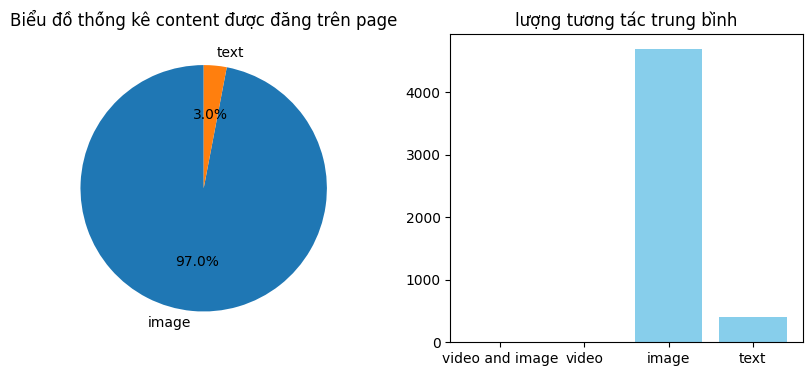

In [198]:
import matplotlib.pyplot as plt

labels = check_content.keys()
sizes = check_content.values()
bar_values = content_react_avg.values()

non_zero_sizes = [size for size in sizes if size != 0]
non_zero_labels = [label for label, size in zip(labels, sizes) if size != 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))



# Tạo biểu đồ tròn
ax1.pie(non_zero_sizes, labels=non_zero_labels, autopct='%1.1f%%', startangle=90)
# Thêm tiêu đề
ax1.set_title('Biểu đồ thống kê content được đăng trên page')

ax2.bar(labels, bar_values, color='skyblue')
ax2.set_title("lượng tương tác trung bình")

# Hiển thị biểu đồ
plt.show()



In [199]:
post_df_full_with_reactions

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,image_ids,was_live,fetched_time,thích,yêu thích,haha,thương thương,wow,buồn,phẫn nộ
0,881937446740787,"Java, West of Krakatoa","Java, West of Krakatoa",NaN,NaN,2023-12-01 10:19:04,1701400744,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,['881937433407455'],False,2023-12-01 11:09:37.830785,40.0,6.0,3.0,NaN,NaN,NaN,NaN
1,881916090076256,How do you prefer your coffee?\n\nBạn thích cà...,How do you prefer your coffee?\n\nBạn thích cà...,NaN,How do you prefer your coffee?,2023-12-01 09:18:11,1701397091,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,['881916076742924'],False,2023-12-01 11:09:41.261109,121.0,21.0,45.0,1.0,NaN,NaN,NaN
2,881893906745141,Stay warm!\n\nGiữ ấm nhé!,Stay warm!\n\nGiữ ấm nhé!,NaN,Stay warm!,2023-12-01 08:12:03,1701393123,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,['https://scontent.fhan5-11.fna.fbcdn.net/v/t3...,...,['881893893411809'],False,2023-12-01 11:09:53.257737,161.0,31.0,NaN,1.0,NaN,NaN,NaN
3,881881576746374,Valid.\n\nHợp lệ.,Valid.\n\nHợp lệ.,NaN,Valid.,2023-12-01 07:34:50,1701390890,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan5-1.fna.fbcdn.net/v/t39...,...,['881881526746379'],False,2023-12-01 11:10:05.067799,690.0,161.0,139.0,9.0,NaN,NaN,NaN
4,881863260081539,Isn't that nice? Hmmm?,Isn't that nice? Hmmm?,NaN,NaN,2023-12-01 06:35:31,1701387331,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,['https://scontent.fhan5-11.fna.fbcdn.net/v/t3...,...,['881862436748288'],False,2023-12-01 11:10:40.203217,282.0,40.0,82.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,877186513882547,hehe,hehe,NaN,NaN,2023-11-21 22:36:02,1700580962,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan5-2.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,['877186490549216'],False,2023-12-01 11:32:49.844572,1759.0,396.0,279.0,16.0,4.0,NaN,NaN
96,877131183888080,Silence please.\n\nLàm ơn im lặng.,Silence please.\n\nLàm ơn im lặng.,NaN,Silence please.,2023-11-21 20:36:05,1700573765,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan5-8.fna.fbcdn.net/v/t39...,...,['877131157221416'],False,2023-12-01 11:33:07.391419,745.0,88.0,251.0,4.0,NaN,NaN,NaN
97,877123583888840,Legit.\n\nHợp pháp.,Legit.\n\nHợp pháp.,NaN,Legit.,2023-11-21 20:19:05,1700572745,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,...,['877123563888842'],False,2023-12-01 11:33:18.145352,24485.0,2743.0,5485.0,178.0,57.0,8.0,3.0
98,877095150558350,Mood,Mood,NaN,NaN,2023-11-21 19:06:01,1700568361,https://scontent.fhan5-9.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-9.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan5-9.fna.fbcdn.net/v/t39...,...,['877095120558353'],False,2023-12-01 11:33:46.004196,1627.0,210.0,627.0,16.0,2.0,NaN,NaN


In [203]:
#loại bỏ bản dịch 
for i in range(0, len(post_df_full_with_reactions), 1):
    tmp = post_df_full_with_reactions['post_text'].values[i]
    if tmp.find('\n\n') != -1:
        post_df_full_with_reactions['post_text'].values[i] = tmp[:tmp.find("\n\n") + 1]
        post_df_full_with_reactions['text'].values[i] = tmp[:tmp.find("\n\n") + 1]
        
    #print(tmp)
    
post_df_full_with_reactions.head(5)

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,image_ids,was_live,fetched_time,thích,yêu thích,haha,thương thương,wow,buồn,phẫn nộ
0,881937446740787,"Java, West of Krakatoa","Java, West of Krakatoa",NaN,NaN,2023-12-01 10:19:04,1701400744,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,['881937433407455'],False,2023-12-01 11:09:37.830785,40.0,6.0,3.0,NaN,NaN,NaN,NaN
1,881916090076256,How do you prefer your coffee?\n,How do you prefer your coffee?\n,NaN,How do you prefer your coffee?,2023-12-01 09:18:11,1701397091,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,['881916076742924'],False,2023-12-01 11:09:41.261109,121.0,21.0,45.0,1.0,NaN,NaN,NaN
2,881893906745141,Stay warm!\n,Stay warm!\n,NaN,Stay warm!,2023-12-01 08:12:03,1701393123,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,['https://scontent.fhan5-11.fna.fbcdn.net/v/t3...,...,['881893893411809'],False,2023-12-01 11:09:53.257737,161.0,31.0,NaN,1.0,NaN,NaN,NaN
3,881881576746374,Valid.\n,Valid.\n,NaN,Valid.,2023-12-01 07:34:50,1701390890,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan5-1.fna.fbcdn.net/v/t39...,...,['881881526746379'],False,2023-12-01 11:10:05.067799,690.0,161.0,139.0,9.0,NaN,NaN,NaN
4,881863260081539,Isn't that nice? Hmmm?,Isn't that nice? Hmmm?,NaN,NaN,2023-12-01 06:35:31,1701387331,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,['https://scontent.fhan5-11.fna.fbcdn.net/v/t3...,...,['881862436748288'],False,2023-12-01 11:10:40.203217,282.0,40.0,82.0,3.0,NaN,NaN,NaN


In [201]:
# Lấy tất cả các bài viết

post_df_full_with_reactions['post_text']
text = "" 
for i in post_df_full_with_reactions['post_text']:
  print(i)
  text= text + i + "\n"
#print(text)

Java, West of Krakatoa
How do you prefer your coffee?

Stay warm!

Valid.

Isn't that nice? Hmmm?
It's never too cold for iced coffee!

Moooooooooooooo
For sure!

Always!

For sure.

I feel that!

Indeed!

I have no idea....

Love it!

Legit.

#coffee
I love it!

For sure!

The nerve!

Bit chilly eh?
Quiet time.

It's almost Bowl Season, but it's always cup season around here!
#coffee
Yeah it does!

It's Coffee!
Nice!

Awwwwwwwwwww

#coffee
Love it!

Cute!
Perfect day!

Winter coffee is the best!
It's the best!

That would really help!

I feel that!

Clearly.

HAHA
So true!

Filled with Christmas Cheer!
Always!

LOL
For sure.

I need to cancel the week.
Indeed!

Indeed!

It really does!

Seriously.

Love it!

You up?

Awwwwwww

Indeed!

Yeah it does!

#coffee
She'd like to speak with your manager...
Little creep.

Always!

Majestic!

#coffee
Shhhhhhhhhhhh
It's barely helping....
Legit!

So cute!

Mmmmmmmmmmmmmm
Look busy....
I hope so!

Cute!
For real...

Perfect!

Love it!

Coffee wit

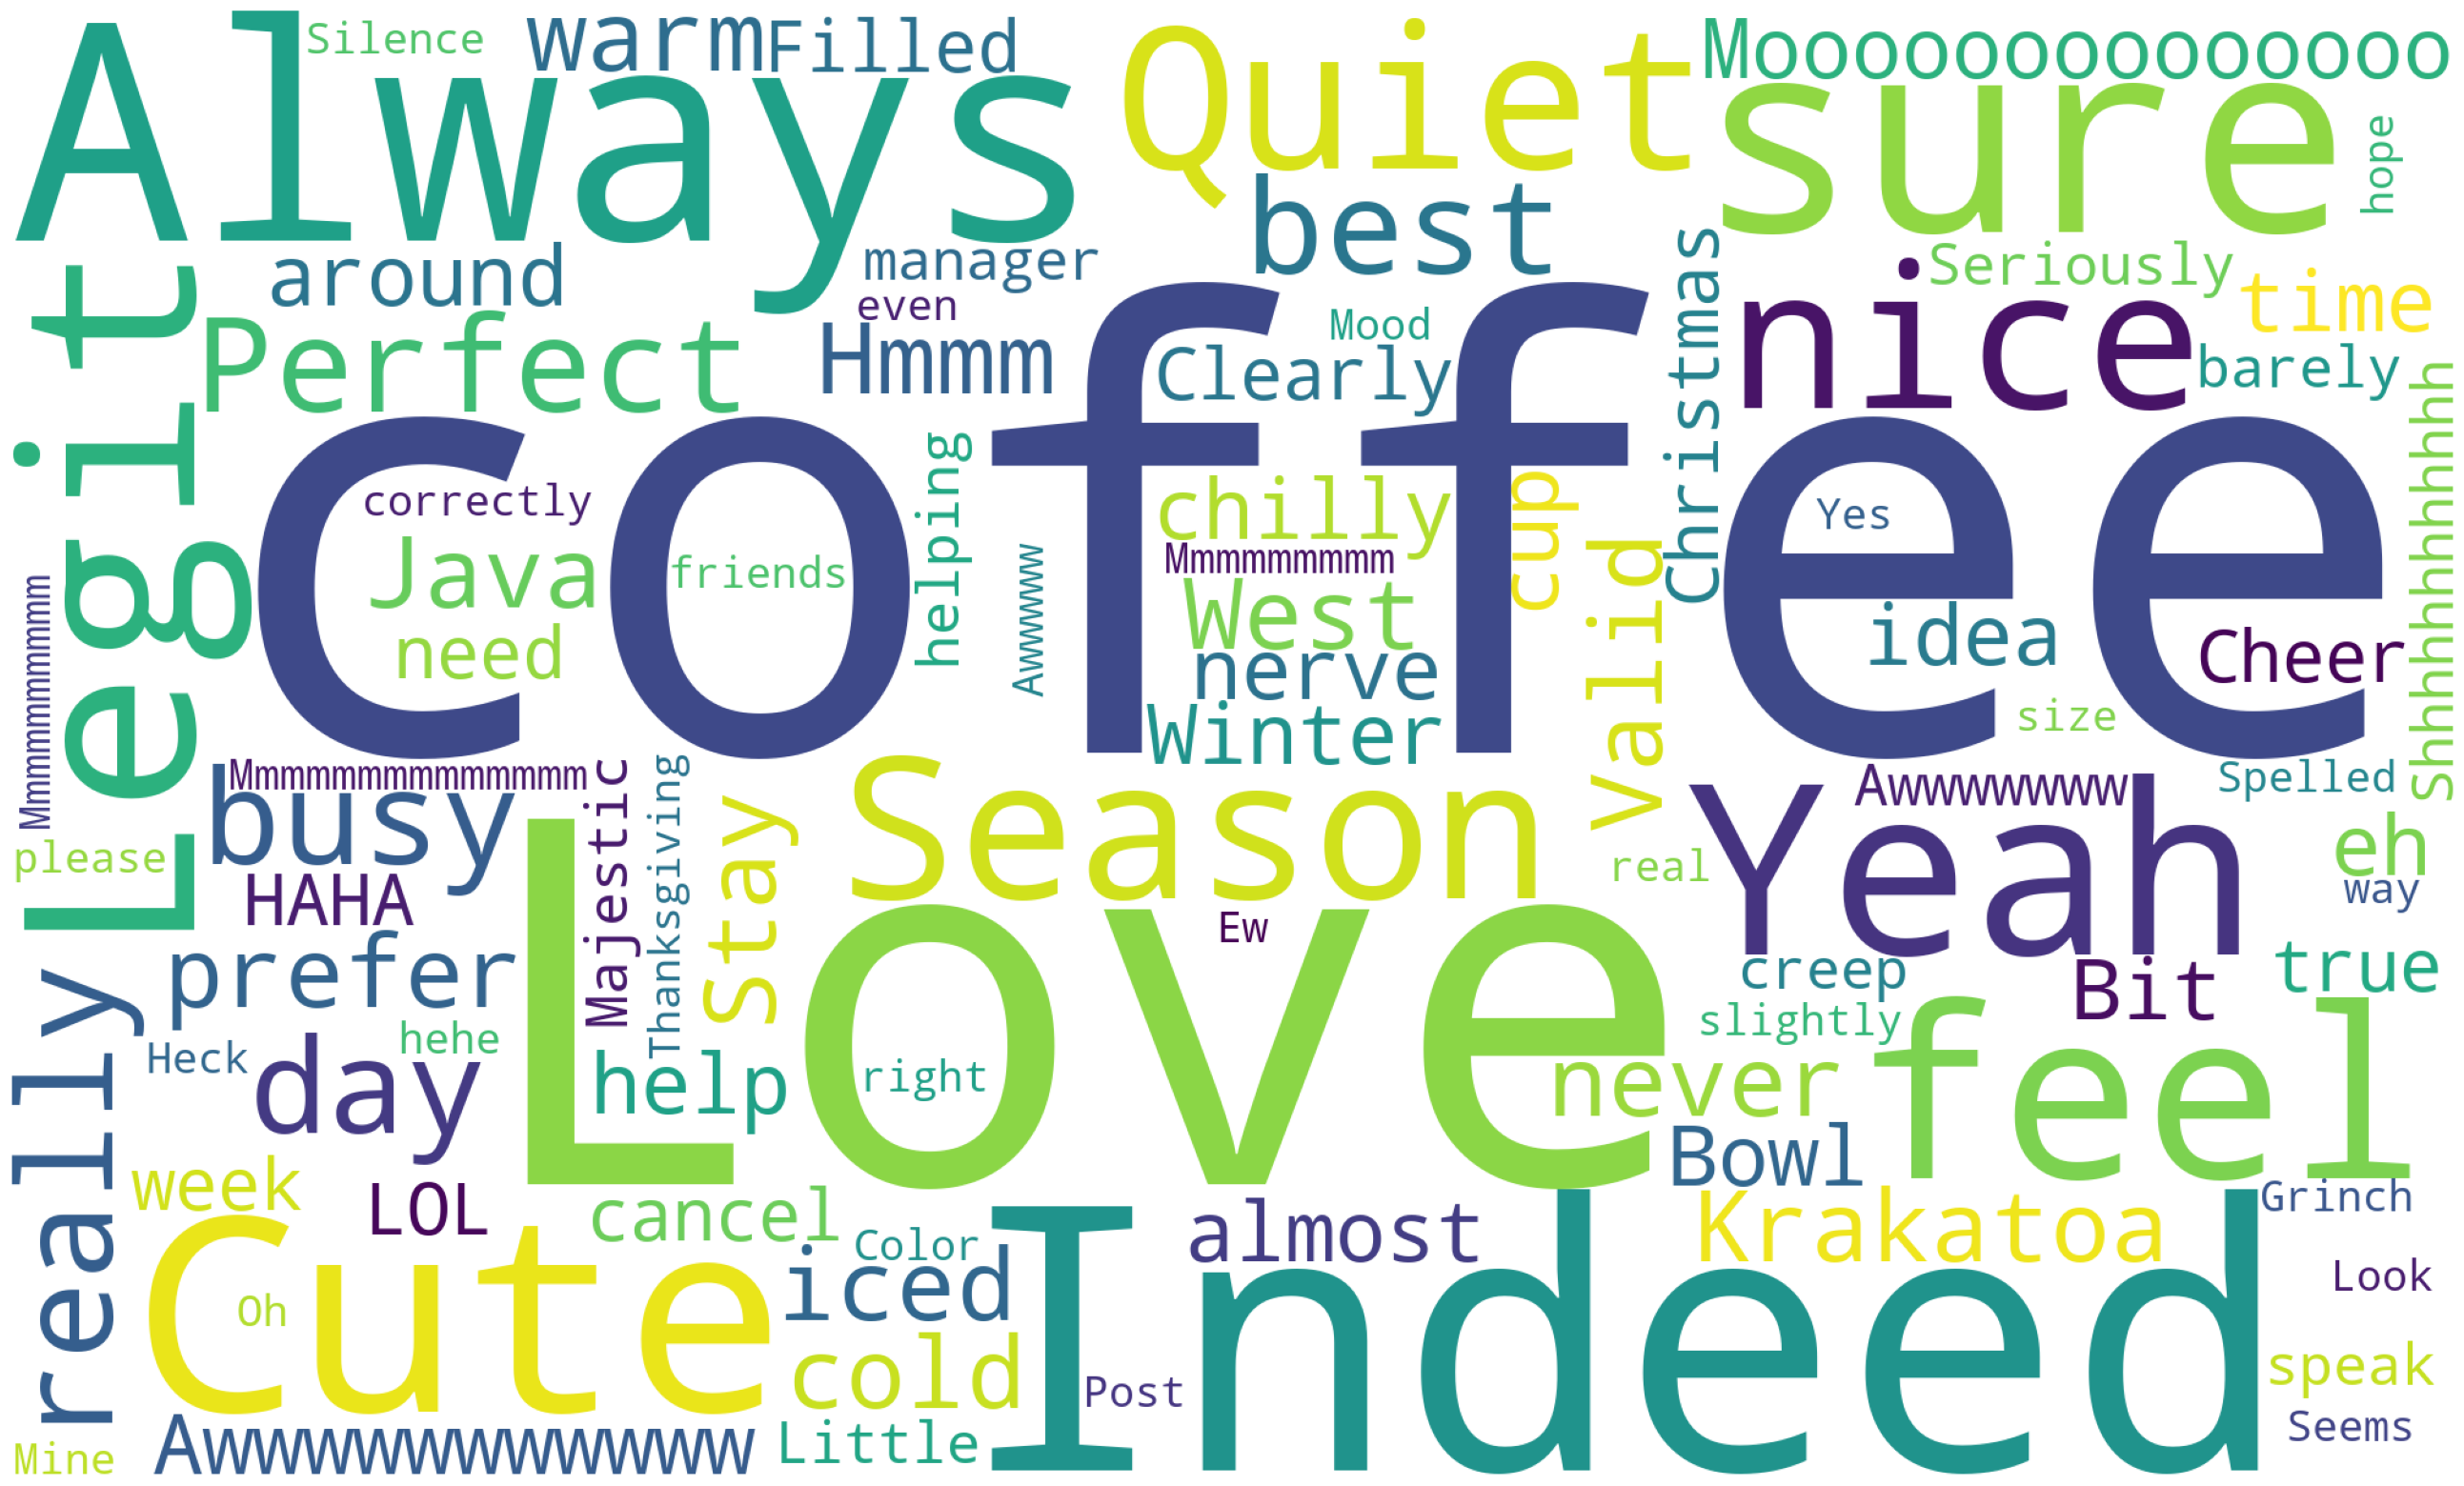

In [202]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [226]:
# Lấy tần suất của từng từ
word_frequencies = wordcloud.words_
#print(word_frequencies)

# In ra các từ được sử dụng nhiều nhất (ví dụ, top 10 từ)
top_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:5]
for word, frequency in top_words:
    print(f"{word}: {frequency}")
#type(top_words)

coffee: 1.0
Love: 0.6666666666666666
Indeed: 0.5
Always: 0.4166666666666667
sure: 0.3333333333333333


In [222]:
key_word = top_words[0][0]
count =  0
for i in range(0, len(post_df_full_with_reactions), 1):
    if key_word in post_df_full_with_reactions['post_text'].values[i]:
        count += 1
        
count

10